# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename, header=0)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

The data set I have chosen is the census data set (censusData.csv). I will be predicting whether a person earns more than $50k or less than or equal to $50k and the label column is income_binary. This is a supervised learning problem and it is binary classification because the predicted label can be one of two categories. My features are age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex_selfID, capital-gain, capital-loss, hours-per-week, native-country, and income_binary. Predicting income levels helps companies better target products, services, and marketing by understanding customer purchasing power. For example, financial institutions can use this to pre-qualify clients for loans, while retailers can personalize offerings based on expected income. This leads to higher conversion rates and more efficient resource allocation.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
df.shape

(32561, 15)

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


In [5]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

One-Hot Encoding

In [6]:
to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex_selfID',
 'native-country',
 'income_binary']

In [7]:
df[to_encode].nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex_selfID         2
native-country    41
income_binary      2
dtype: int64

In [8]:
top_native_country = list(df['native-country'].value_counts().head(10).index)

top_native_country

['United-States',
 'Mexico',
 'Philippines',
 'Germany',
 'Canada',
 'Puerto-Rico',
 'El-Salvador',
 'India',
 'Cuba',
 'England']

In [9]:
for value in top_native_country:
    
    df['Native_Country_'+ value] = np.where(df['native-country']==value,1,0)
    
    
df.drop(columns = 'native-country', inplace=True)

In [10]:
#One hot encode the rest of the columns using Pandas
to_encode = ['workclass', 'marital-status', 'occupation', 
             'relationship', 'race', 'sex_selfID']

for column in to_encode:
    if column in df.columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)

In [11]:
#Need to convert income_binary column to numerics
df['income_binary'] = df['income_binary'].apply(lambda x: 1 if x == '>50K' else 0)

Categorical Variables

In [12]:
edu_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th',
             '11th', '12th', 'HS-grad', 'Prof-school', 'Assoc-acdm',
             'Assoc-voc', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']

# Convert the education column to an ordered categorical type
df['education'] = pd.Categorical(df['education'], categories=edu_order, ordered=True)

# Check the new dtype
print(df['education'].dtype)
df['education_code'] = df['education'].cat.codes

category


Detecting Outliers: Winsorization

<AxesSubplot: xlabel='capital-gain', ylabel='Count'>

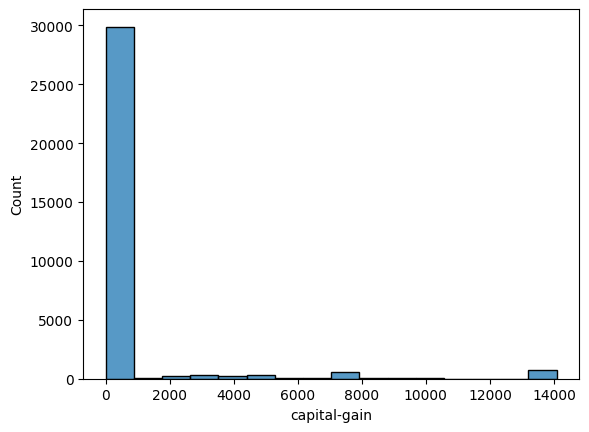

In [13]:
sns.histplot(data=df, x="capital-gain")

<AxesSubplot: xlabel='capital-loss', ylabel='Count'>

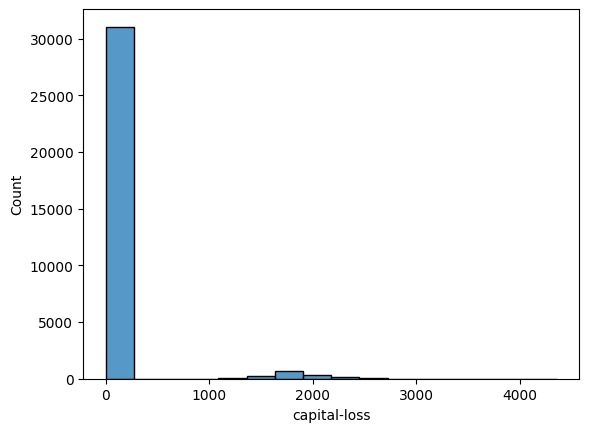

In [14]:
sns.histplot(data=df, x="capital-loss")

In [15]:
import scipy.stats as stats

# Winsorize capital-gain
df['capital-gain'] = stats.mstats.winsorize(df['capital-gain'], limits=[0.01, 0.01])

# Winsorize capital-loss
df['capital-loss'] = stats.mstats.winsorize(df['capital-loss'], limits=[0.01, 0.01])

Identifying Missing Values

In [16]:
df.isnull().values.any()

True

In [17]:
df.isnull().head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,income_binary,Native_Country_United-States,Native_Country_Mexico,...,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_selfID_Female,sex_selfID_Non-Female,education_code
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                      162
fnlwgt                     0
education                  0
education-num              0
capital-gain               0
                        ... 
race_Other                 0
race_White                 0
sex_selfID_Female          0
sex_selfID_Non-Female      0
education_code             0
Length: 61, dtype: int64

In [19]:
condition = nan_count != 0 # look for all columns with missing values

col_names = nan_count[condition].index # get the column names
print(col_names)

nan_cols = list(col_names) # convert column names to list
print(nan_cols)

Index(['age', 'hours-per-week'], dtype='object')
['age', 'hours-per-week']


In [20]:
nan_col_types = df[nan_cols].dtypes
nan_col_types

age               float64
hours-per-week    float64
dtype: object

In [21]:
df['age_na'] = df['age'].isnull()
df['hours-per-week_na'] = df['hours-per-week'].isnull()
df.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,income_binary,Native_Country_United-States,Native_Country_Mexico,...,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_selfID_Female,sex_selfID_Non-Female,education_code,age_na,hours-per-week_na
0,39.0,77516,Bachelors,13,2174,0,40.0,0,1,0,...,0,0,0,0,1,0,1,13,False,False
1,50.0,83311,Bachelors,13,0,0,13.0,0,1,0,...,0,0,0,0,1,0,1,13,False,False
2,38.0,215646,HS-grad,9,0,0,40.0,0,1,0,...,0,0,0,0,1,0,1,8,False,False
3,53.0,234721,11th,7,0,0,40.0,0,1,0,...,0,0,1,0,0,0,1,6,False,False
4,28.0,338409,Bachelors,13,0,0,40.0,0,0,0,...,0,0,1,0,0,1,0,13,False,False


In [22]:
mean_ages=df['age'].mean()
print("mean value for all age columns: " + str(mean_ages))
mean_hours_per_week=df['hours-per-week'].mean()
print("mean value for all hours per weeks columns: " + str(mean_hours_per_week))

# fill all missing values with the mean
df['age'].fillna(value=mean_ages, inplace=True)
df['hours-per-week'].fillna(value=mean_hours_per_week, inplace=True)

mean value for all age columns: 38.58921571653446
mean value for all hours per weeks columns: 40.450428092815486


Addressing Class Imbalance

In [23]:
# Count of each class
print(df['income_binary'].value_counts())

# Proportion of each class
print(df['income_binary'].value_counts(normalize=True))

0    24720
1     7841
Name: income_binary, dtype: int64
0    0.75919
1    0.24081
Name: income_binary, dtype: float64


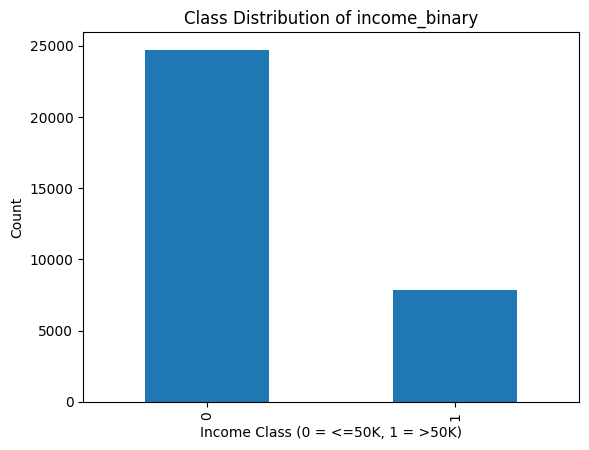

In [24]:
import matplotlib.pyplot as plt

df['income_binary'].value_counts().plot(kind='bar')
plt.title('Class Distribution of income_binary')
plt.xlabel('Income Class (0 = <=50K, 1 = >50K)')
plt.ylabel('Count')
plt.show()

Visualizing Relationships

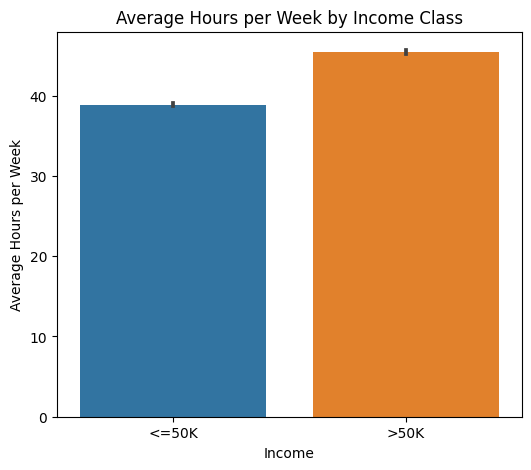

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.barplot(x='income_binary', y='hours-per-week', data=df)
plt.xticks([0,1], ['<=50K', '>50K'])
plt.title('Average Hours per Week by Income Class')
plt.xlabel('Income')
plt.ylabel('Average Hours per Week')
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After inspecting the data, I've decided to keep all the features as I believe all of them play a role in predicting the label and none are unimportant. Some data preparation techniques I used was winsorization to remove any potential outliers, I imputed missing values, and I also one hot encoded the categorical columns. I also created a binary target variable (income_binary) to support classification. For data preparation, I split the data into training and test sets using stratified sampling to maintain class balance. I applied standardization using StandardScaler to ensure numerical features were on a similar scale, particularly for models like logistic regression that are sensitive to feature magnitudes.

To model the data, I chose logistic regression as a baseline due to its simplicity and interpretability, and a random forest classifier to explore a more complex, non-linear approach capable of handling feature interactions. I plan to train both models on the training set and evaluate their performance using metrics such as AUC (Area Under the ROC Curve), along with accuracy, precision, and recall if needed. This evaluation will help me compare how well each model generalizes to unseen data. If time allows, I will tune hyperparameters—such as regularization strength for logistic regression and number of trees for the random forest—using cross-validation to improve performance. The final model will be selected based on its overall effectiveness in balancing performance and generalizability.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

Logistic Regression AUC: 0.909
Random Forest AUC: 0.908


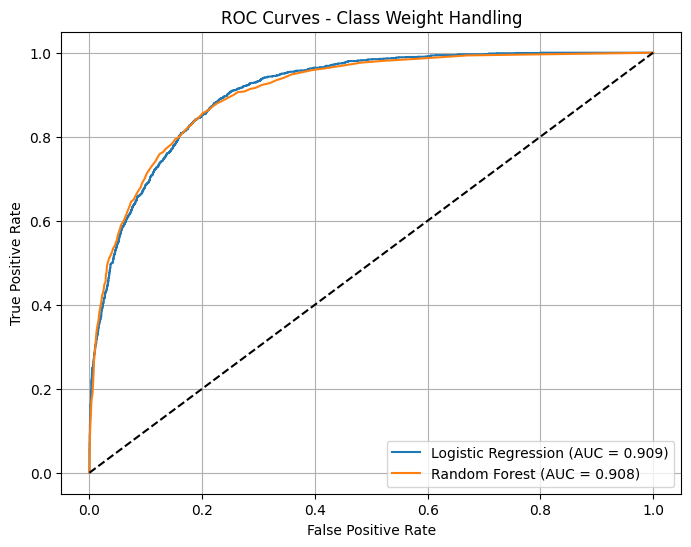

In [27]:
# One-hot encode all categorical features
df = pd.get_dummies(df, drop_first=True)

# Split into features and target
y = df['income_binary']
X = df.drop('income_binary', axis=1)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression with class weights
lr_model = LogisticRegression(max_iter=2000, class_weight='balanced')
lr_model.fit(X_train, y_train)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Random Forest with class weights
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# ROC curve and AUC scores
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

# Print AUCs
print("Logistic Regression AUC:", round(auc_lr, 3))
print("Random Forest AUC:", round(auc_rf, 3))

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.3f})'.format(auc_lr))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.3f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Class Weight Handling')
plt.legend()
plt.grid(True)
plt.show()

The ROC curve and AUC values in the graph above compare the performance of two models: Logistic Regression and Random Forest. Both models perform very well, with AUC scores of 0.909 and 0.908, respectively. These scores indicate that both classifiers are highly capable of distinguishing between income classes (≤50K and >50K), with Logistic Regression slightly outperforming Random Forest.

The ROC curves for both models are consistently high across the full range of false positive rates, showing strong true positive rates and minimal trade-offs. The Logistic Regression model's slight edge may be due to effective feature scaling and the linear relationship between some predictors and the target variable. On the other hand, the Random Forest model, while slightly less performant, still offers competitive results and may be more robust to overfitting on different data.

In conclusion, both models generalize well, and either could be used effectively for income classification, but Logistic Regression may be preferred for its simplicity and nearly identical performance.

Fine tuning Logistic Regression Hyperparameters

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Define the model (with class_weight='balanced' as you had)
lr = LogisticRegression(max_iter=2000, class_weight='balanced')

# Hyperparameter grid to search over
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],    # Regularization strength
    'solver': ['liblinear', 'lbfgs'], # Solver options
}

# Setup GridSearchCV with ROC AUC scoring and 5-fold CV
grid_search_lr = GridSearchCV(lr, param_grid_lr, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

# Fit on training data
grid_search_lr.fit(X_train, y_train)

# Print best parameters and best CV score
print("Best Logistic Regression params:", grid_search_lr.best_params_)
print("Best Logistic Regression CV AUC:", grid_search_lr.best_score_)

# Evaluate best model on test set
best_lr = grid_search_lr.best_estimator_
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]
test_auc_lr = roc_auc_score(y_test, y_proba_lr)
print("Logistic Regression Test AUC:", round(test_auc_lr, 3))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Logistic Regression params: {'C': 0.01, 'solver': 'liblinear'}
Best Logistic Regression CV AUC: 0.9057616130404955
Logistic Regression Test AUC: 0.909


To optimize the Logistic Regression model, I performed hyperparameter tuning using GridSearchCV with 5-fold cross-validation. The parameters tuned included the regularization strength (C), which controls how strongly the model is regularized to prevent overfitting, and the solver algorithm, which determines the optimization method. The tuning process used the ROC AUC score as the evaluation metric, as it effectively measures the model’s ability to distinguish between classes, especially in imbalanced datasets. After training on the training set, the grid search identified the best combination of hyperparameters, which was then used to fit the final model. Evaluating this optimized model on the test set yielded the final ROC AUC score, demonstrating how well the model generalizes to unseen data. The best logistic regression params were C=.01, and solver is liblinear.

Finetuning random forest hyperparameters

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define the model (with class_weight='balanced')
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

# Setup GridSearchCV with ROC AUC scoring and 5-fold CV
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

# Fit on training data
grid_search_rf.fit(X_train, y_train)

# Print best parameters and best CV score
print("Best Random Forest params:", grid_search_rf.best_params_)
print("Best Random Forest CV AUC:", grid_search_rf.best_score_)

# Evaluate best model on test set
best_rf = grid_search_rf.best_estimator_
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
test_auc_rf = roc_auc_score(y_test, y_proba_rf)
print("Random Forest Test AUC:", round(test_auc_rf, 3))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Random Forest params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest CV AUC: 0.9085706702001948
Random Forest Test AUC: 0.913


To improve the performance of the Random Forest model, I conducted hyperparameter tuning using GridSearchCV with 5-fold cross-validation, testing a total of 18 parameter combinations which resulted in 90 fits. The hyperparameters tuned were the number of trees (n_estimators), the maximum depth of each tree (max_depth), and the minimum number of samples required to split an internal node (min_samples_split), while using class_weight='balanced' to address class imbalance. The ROC AUC score was used as the evaluation metric to capture the model’s ability to distinguish between classes. The grid search identified the best hyperparameters as max_depth=None, min_samples_split=5, and n_estimators=200, achieving a best cross-validation ROC AUC of approximately 0.909. When evaluated on the test set, the optimized Random Forest model achieved a ROC AUC of 0.913, indicating strong generalization performance on unseen data.